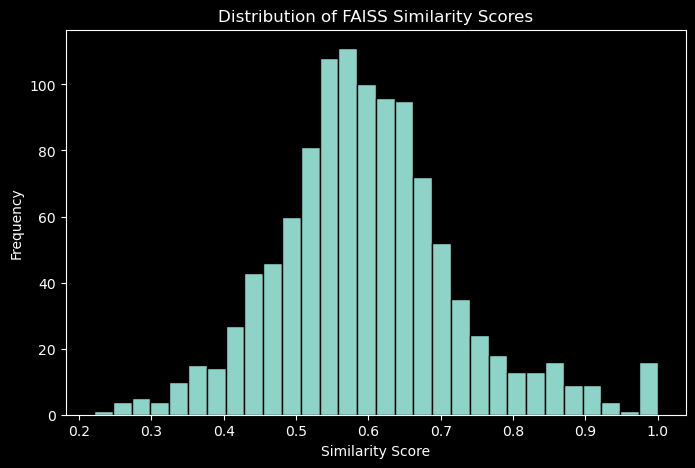

In [59]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/Users/amalkurian/Desktop/Dissertation/Bias Detection/Deliverables/matching_articles04.csv')
# Example: assume your DataFrame is called df and the column is 'faiss_scores'
# If scores are stored as lists/arrays, flatten them out first
all_scores = df['match_score_faiss'].explode().astype(float)

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(all_scores, bins=30, edgecolor='black')
plt.title("Distribution of FAISS Similarity Scores")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()


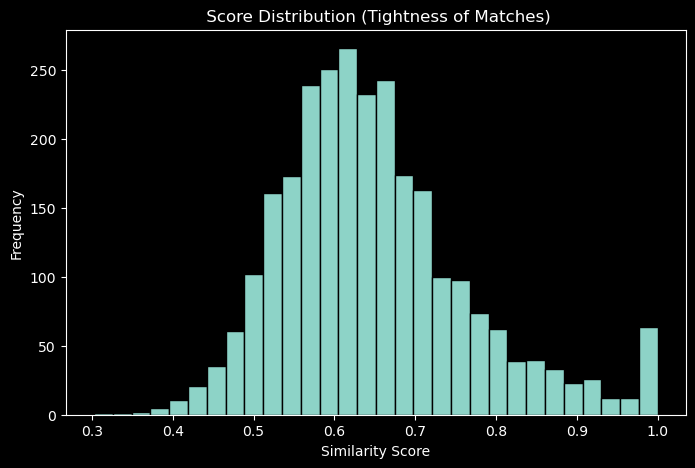

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

import ast

df = pd.read_csv('/Users/amalkurian/Desktop/Dissertation/Bias Detection/Deliverables/matching_articles04.csv')
# Convert string representations of lists to actual lists
df['match_score_list'] = df['match_score'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])

# Flatten all scores into a single list
all_scores = [score for sublist in df['match_score_list'] for score in sublist]

# Now plot histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(all_scores, bins=30, edgecolor='black')
plt.title(" Score Distribution (Tightness of Matches)")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()




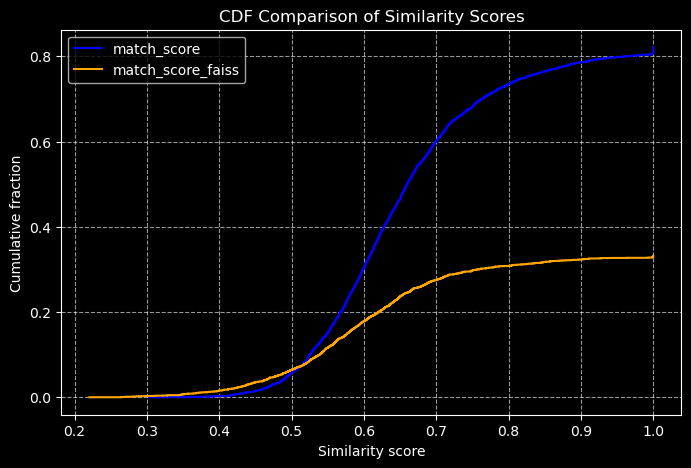

In [16]:
import ast
import numpy as np
import matplotlib.pyplot as plt

def process_column(series):
    # Parse stringified lists like "[0.64, 0.72]"
    scores = series.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    # Flatten into a single array
    return np.array([s for sublist in scores for s in (sublist if isinstance(sublist, list) else [sublist])], dtype=float)

# Process both columns
scores_normal = process_column(df['match_score'])
scores_faiss = process_column(df['match_score_faiss'])

# Sort and compute CDFs
def get_cdf(values):
    sorted_vals = np.sort(values)
    cdf = np.arange(1, len(sorted_vals)+1) / len(sorted_vals)
    return sorted_vals, cdf

sorted_normal, cdf_normal = get_cdf(scores_normal)
sorted_faiss, cdf_faiss = get_cdf(scores_faiss)

# Plot both CDFs
plt.figure(figsize=(8,5))
plt.step(sorted_normal, cdf_normal, where="post", label="match_score", color="blue")
plt.step(sorted_faiss, cdf_faiss, where="post", label="match_score_faiss", color="orange")
plt.xlabel("Similarity score")
plt.ylabel("Cumulative fraction")
plt.title("CDF Comparison of Similarity Scores")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()



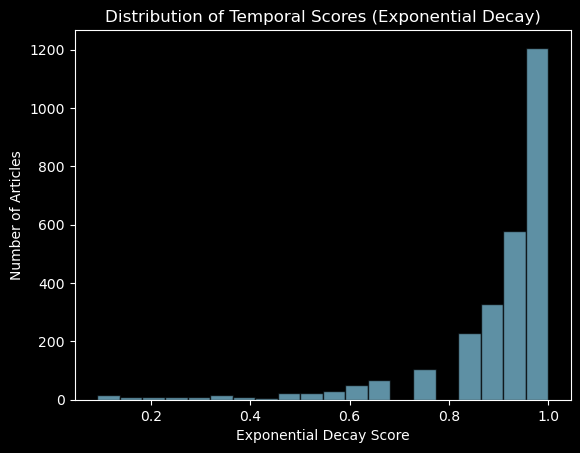

In [21]:
import ast

# Convert strings like "[0.9737]" into real floats
def parse_score(x):
    if pd.isna(x):
        return None
    if isinstance(x, str):
        val = ast.literal_eval(x)   # safely evaluates "[0.9737]" -> [0.9737]
        if isinstance(val, list):
            return val[0]           # take the first element
        return val
    return x  # already numeric

df['temporal_score_exp_clean'] = df['temporal_score_exp'].apply(parse_score)

# Now plot
plt.hist(df['temporal_score_exp_clean'].dropna(), bins=20, alpha=0.7,
         color='skyblue', edgecolor='black')
plt.xlabel("Exponential Decay Score")
plt.ylabel("Number of Articles")
plt.title("Distribution of Temporal Scores (Exponential Decay)")
plt.show()





In [18]:
df.columns

Index(['title', 'author', 'source', 'content', 'topic', 'url', 'keywords',
       'query', 'cleaned_content', 'entities', 'article_id', 'entities_Group',
       'labels_Group', 'Key_Phrases', 'Actions', 'Load_Date', 'Language',
       'Person', 'matching_events', 'character_count', 'word_count',
       'processed_text', 'processed_tokens_split', 'num_tokens', 'story_chain',
       'match_score_faiss', 'temporal_scores', 'match_Labels_x',
       'actor_entities_y', 'geo_entities_y', 'event_id', 'actor_score',
       'geo_score', 'combined_score', 'match_score', 'temporal_score_exp',
       'final_scores_y', 'match_Labels_y', 'Date', 'match_score_list'],
      dtype='object')

In [61]:
article_df = df 
events_df = pd.read_csv('/Users/amalkurian/Desktop/Dissertation/Bias Detection/Deliverables/events02_df.csv')

In [62]:
article_df['matching_events']

0       ['2c92c68e655d3678c72144993416a978c0b712596d1b...
1       ['b35d634334a906bcae512a4b5ccb2b7db12647b48a5c...
2       ['1c42c615cffaba2cd9714088f4e868c37fc194a2c33f...
3       ['2c92c68e655d3678c72144993416a978c0b712596d1b...
4       ['67fe0b94e18720ce5f1bafde9d855a4c9fcacfae147b...
                              ...                        
3313    ['67fe0b94e18720ce5f1bafde9d855a4c9fcacfae147b...
3314    ['1c42c615cffaba2cd9714088f4e868c37fc194a2c33f...
3315    ['2c92c68e655d3678c72144993416a978c0b712596d1b...
3316    ['1c42c615cffaba2cd9714088f4e868c37fc194a2c33f...
3317    ['4e679bc9c7652323335af6694a3f3338003dda9835b2...
Name: matching_events, Length: 3318, dtype: object

In [32]:
events_df.columns

Index(['title', 'date_str', 'author', 'icon', 'siteName', 'tags_label', 'text',
       'sentiment', 'pageUrl', 'quotes_quote', 'event_id', 'entities',
       'entities_Group', 'labels_Group', 'actor_entities', 'geo_entities'],
      dtype='object')

In [ ]:
# events_df['date_str'] = (
#     events_df['date_str']
#     .str.replace(r'^d','',regex=True)
# )

# events_df['date_str'] = events_df['date_str'].str.split('T').str[0] # str is an accessor for string operations on Series
# events_df['date_str'] = pd.to_datetime(events_df['date_str'], format='%Y-%m-%d', errors='coerce')
# events_df['date_str'].head()

0   2022-10-10
1   2022-10-16
2   2022-10-12
3   2022-10-13
4   2022-12-14
Name: date_str, dtype: datetime64[ns]

In [63]:
# Ensure matching type and clean
# article_df['matching_events'] = article_df['matching_events'].apply(lambda lst: [str(x).strip() for x in lst])
events_df['event_id'] = events_df['event_id'].astype(str).str.strip()


In [68]:
event_date_lookup = dict(zip(events_df['event_id'], events_df['date_str']))

In [70]:
event_date_lookup

{'10611e1253fa30334825388305170d3196c55d2b1adb91a5266c89114da1bcd7': Timestamp('2022-10-10 00:00:00'),
 '3dc5396918dd4cde41aaa8fdfa3779a2bd2d55785c7fb5fe8d002fa9db04f7fc': Timestamp('2022-10-16 00:00:00'),
 '0ea220ad2ecf9abb46c0cd2bcf5aa6099c9c87a48b9395dc1b3b040e3bb980c8': Timestamp('2022-10-12 00:00:00'),
 '5f46c4ef3f7c3b257e3097bbf98e760638addf84170184a914d6a99826c36305': Timestamp('2022-10-13 00:00:00'),
 '5f2cab6a1f586516a5a49ad4e86368590733e46612aae044b919e50b41f15558': Timestamp('2022-12-14 00:00:00'),
 '4e679bc9c7652323335af6694a3f3338003dda9835b29a71e9cbc94274816acc': Timestamp('2022-10-29 00:00:00'),
 '10d3acb4d7aeb68f8ac52327b290f94dfd9becf149ed14585535cc4d83dfae8a': Timestamp('2023-02-15 00:00:00'),
 '10d27b6e7114fb8de7373c07930ec0e51086d3a109300ada6552ec469274f852': Timestamp('2023-02-27 00:00:00'),
 'ba47e50400db4fe337336daecaa2c2bde9aa8345c6636d91ff181c21f7f0a508': Timestamp('2022-09-20 00:00:00'),
 '90443ce367ef3cbe4c02f1bd42fdfe0108615260e1f3d6c7d1e301f389cb58ff': Time

In [74]:

import pandas as pd
import numpy as np
from datetime import datetime
import math

# Convert to datetime if needed
article_df['Load_Date'] = pd.to_datetime(article_df['Load_Date'])
events_df['date_str'] = pd.to_datetime(events_df['date_str'])

# Params from the paper
alpha_h = 1.0  # for historical
alpha_p = 0.8  # for predictive
lambda_ = 0.8
max_past_days = 30
max_future_days = 10

# Convert events_df to a dict for fast lookup


# Function to calculate temporal proximity 
# Distance from 0 is considered over negative or positive value
# def compute_exp_temporal_score(pub_date, event_date):
#     delta_days = (event_date - pub_date).days  # Positive if event after article (predictive)
    
#     if delta_days > 0:
#         # Predictive reporting Kind of optional categorization in this context
#         decay = delta_days / max_future_days
#         score = alpha_p * np.exp(-lambda_ * decay)
#     else:
#         # Historical reporting
#         decay = abs(delta_days) / max_past_days
#         score = alpha_h * np.exp(-lambda_ * decay)
    
#     return round(score, 4)

def compute_log_temporal_score(pub_date, event_date):
    delta_days = abs((event_date - pub_date).days)

    if delta_days > 0:
        H = 7
    else:
        H = 27

    value = (delta_days + 1)/H
    inner = math.log(value)
    if inner <= 0.0:
        return 0.0
    
    score = -math.log(H * inner) / math.log(H)
    return round(score, 4)

# Apply to all article-event pairs
def compute_temporal_scores(row):
    pub_date = row['Load_Date']
    matching_events_list = row.get('matching_events', [])
    matching_events = ast.literal_eval(matching_events_list)
    exp_scores = {}
    log_scores = {}

    for eid in matching_events:
        event_date = event_date_lookup.get(eid)
        if pd.notna(event_date):
            # exp_score = compute_exp_temporal_score(pub_date, event_date)
            # exp_scores[eid] = exp_score

            log_score = compute_log_temporal_score(pub_date, event_date)
            log_scores[eid] = log_score
    return {'log': log_scores}
    # return {'exp': exp_scores, 'log': log_scores}

# Add temporal proximity scores to article_df
article_df['temporal_scores_log'] = article_df.apply(compute_temporal_scores, axis=1)


In [121]:
import ast

article_df['event_id'] = article_df['event_id'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)


In [125]:
article_df.temporal_scores_log[0]

{'log': {'2c92c68e655d3678c72144993416a978c0b712596d1b524d6523e987e37e0f41': 0.0,
  '7acbfb9edb8a68427726bd24ac1221174ce8bfd40698f33ffeda58bdb851de0c': 0.0,
  '1683fd211aa3219eef3048f4f2610738bc0a1be996614805027225e05a916c4b': -0.5919,
  'f40700dd4cbb06c9a9f448a073501a7d8a8024bbf2b7b471c63cace99c4d80de': -1.0483,
  '3d3536a1334cf71bd4332e19b1ab7b8816f5e65905cc6ab9b418aa5f516b42be': 0.0,
  'ce0a9e8da976c86f904047e3c22f337cae62d71731ea36193c37d4058de1c347': -0.2903,
  'f4fd207f045f01ef1407b6a5c3bb40faa4280a4b8e003bdaf48ebcea66c22308': 0.0,
  'a54baec7313e5beaa0376575fbd012f6af0797209a560dffc5b045e5eef5827e': 0.0,
  '3ee64f118c767996b1b2cd6f96fc769e74da9210f5147a65c5a14be73a2d33b9': 0.0,
  '2633a1fa9c67c5c0f53c91a3b754e4bb51aadab8d626ef4a0e4f9221c3f56d4e': -0.4702,
  'e2a006f0781c07aa1204d6e99f502f057abad17c462d273ca5f9680fe734b78c': 0.0,
  'f406d6cf6ef2d101af4b58450d1b34e7b7a4e56e6e4382b954c98a3645f13d9e': 0.0,
  'd7da99b4eb2b16ca86349cd3f3b1a13fb8e2f06cd7e5ee665e6066204ab34885': 0.0,
  

In [124]:
article_df.event_id[0]

['4dc83fb671cf9902099e6f44157eb4ad50c7b91390f90914a2681c056b8cab1f']

In [127]:
import ast
import pandas as pd
import numpy as np

def get_log_score(row):
    val = row['temporal_scores_log']
    
    # If it's a string, parse to dict
    if isinstance(val, str):
        try:
            val = ast.literal_eval(val)
        except:
            return None
    
    log_dict = val.get("log", {})
    
    # event_id might be NaN or not a list
    event_ids = row['event_id']
    if event_ids is None or (isinstance(event_ids, float) and pd.isna(event_ids)):
        return None
    if not isinstance(event_ids, list):
        event_ids = [event_ids]  # wrap single value into a list
    
    # Now safely iterate
    scores = [log_dict.get(eid, None) for eid in event_ids]
    
    # If only one event_id, return scalar instead of [x]
    if len(scores) == 1:
        return scores[0]
    return scores

article_df['log_score'] = article_df.apply(get_log_score, axis=1)


In [128]:
article_df['log_score']

0              0.0
1          -0.5919
2              0.0
3       [0.0, 0.0]
4          -0.9706
           ...    
3313           0.0
3314           0.0
3315           0.0
3316           0.0
3317           0.0
Name: log_score, Length: 3318, dtype: object

In [129]:
article_df.columns

Index(['title', 'author', 'source', 'content', 'topic', 'url', 'keywords',
       'query', 'cleaned_content', 'entities', 'article_id', 'entities_Group',
       'labels_Group', 'Key_Phrases', 'Actions', 'Load_Date', 'Language',
       'Person', 'matching_events', 'character_count', 'word_count',
       'processed_text', 'processed_tokens_split', 'num_tokens', 'story_chain',
       'match_score_faiss', 'temporal_scores', 'match_Labels_x',
       'actor_entities_y', 'geo_entities_y', 'event_id', 'actor_score',
       'geo_score', 'combined_score', 'match_score', 'temporal_score_exp',
       'final_scores_y', 'match_Labels_y', 'Date', 'temporal_scores_log',
       'log_score'],
      dtype='object')

In [149]:
import numpy as np
import ast

# Parse exp side
def parse_exp(val):
    try:
        if isinstance(val, str):
            val = ast.literal_eval(val)
        if isinstance(val, list):
            return float(np.mean(val)) if val else None
        return float(val)
    except Exception:
        return None

article_df["temporal_score_exp_clean"] = article_df["temporal_score_exp"].apply(parse_exp)


import numpy as np

# Ensure log_score is reduced to a float
def clean_log_score(val):
    if isinstance(val, list):
        return float(np.mean(val)) if val else None
    return val  # already a float or None

article_df["log_score_clean"] = article_df["log_score"].apply(clean_log_score)

# Now subtraction works
article_df["temporal_score_diff"] = (
    article_df["temporal_score_exp_clean"] - article_df["log_score_clean"]
)


In [151]:
article_df["temporal_score_exp_clean"] = article_df["temporal_score_exp"].apply(parse_exp)
article_df["temporal_score_log_clean"] = article_df["log_score"].apply(parse_exp)

# Now difference is safe
article_df["temporal_score_diff"] = (
    article_df["temporal_score_exp_clean"] - article_df["temporal_score_log_clean"]
)


In [152]:
article_df[["temporal_score_exp_clean", "temporal_score_log_clean"]].corr()


,temporal_score_exp_clean,temporal_score_log_clean
temporal_score_exp_clean,1.000000,0.351842
temporal_score_log_clean,0.351842,1.000000


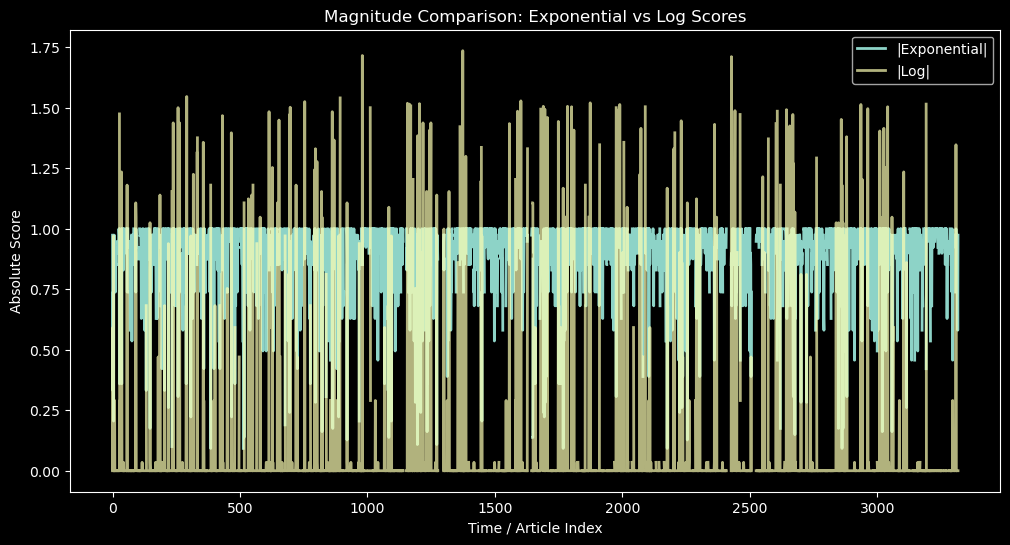

In [175]:
plt.figure(figsize=(12,6))
plt.plot(article_df.index, np.abs(article_df['temporal_score_exp_clean']), label='|Exponential|', linewidth=2)
plt.plot(article_df.index, np.abs(article_df['log_score_clean']), label='|Log|', linewidth=2, alpha=0.7)
plt.xlabel('Time / Article Index')
plt.ylabel('Absolute Score')
plt.title('Magnitude Comparison: Exponential vs Log Scores')
plt.legend()
plt.show()




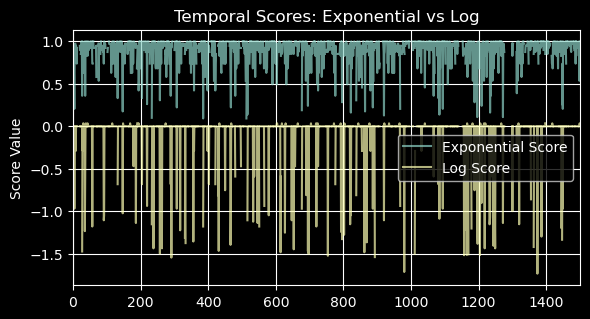

In [186]:
import matplotlib.pyplot as plt
import numpy as np

df = article_df.copy()
df['log_vs_exp_ratio'] = np.abs(df['log_score_clean']) / (np.abs(df['temporal_score_exp_clean']) + 1e-6)

plt.figure(figsize=(6,6))

# Plot temporal scores
plt.subplot(2,1,1)
plt.plot(df.index, df['temporal_score_exp_clean'], label='Exponential Score', alpha=0.7)
plt.plot(df.index, df['log_score_clean'], label='Log Score', alpha=0.7)
plt.title('Temporal Scores: Exponential vs Log')
plt.ylabel('Score Value')
plt.legend()
plt.grid(True)
plt.xlim(0, 1500)  # limit x-axis to first 1500 points

plt.tight_layout()
plt.show()




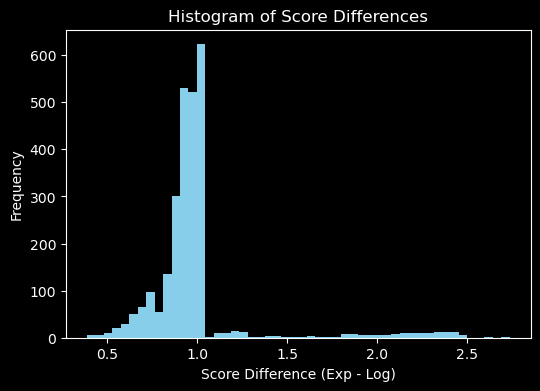

In [184]:
article_df['score_diff'] = article_df['temporal_score_exp_clean'] - article_df['temporal_score_log_clean']

plt.figure(figsize=(6,4))
plt.hist(article_df['score_diff'].dropna(), bins=50, color='skyblue')
plt.xlabel('Score Difference (Exp - Log)')
plt.ylabel('Frequency')
plt.title('Histogram of Score Differences')
plt.show()


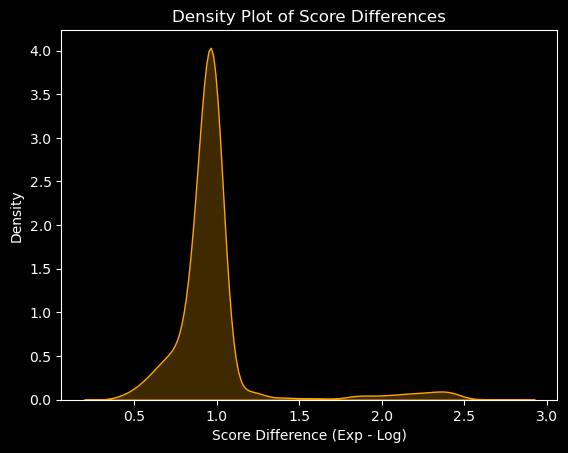

In [159]:
import seaborn as sns

sns.kdeplot(article_df['score_diff'].dropna(), fill=True, color='orange')
plt.xlabel('Score Difference (Exp - Log)')
plt.title('Density Plot of Score Differences')
plt.show()


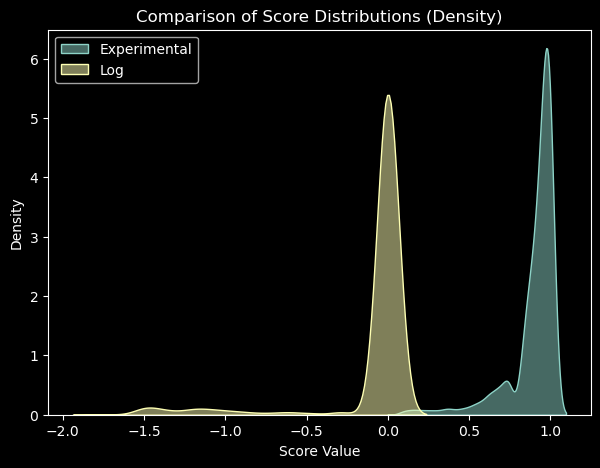

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.kdeplot(article_df['temporal_score_exp_clean'].dropna(), label='Experimental', fill=True, alpha=0.5)
sns.kdeplot(article_df['log_score_clean'].dropna(), label='Log', fill=True, alpha=0.5)
plt.xlabel('Score Value')
plt.ylabel('Density')
plt.title('Comparison of Score Distributions (Density)')
plt.legend()
plt.show()



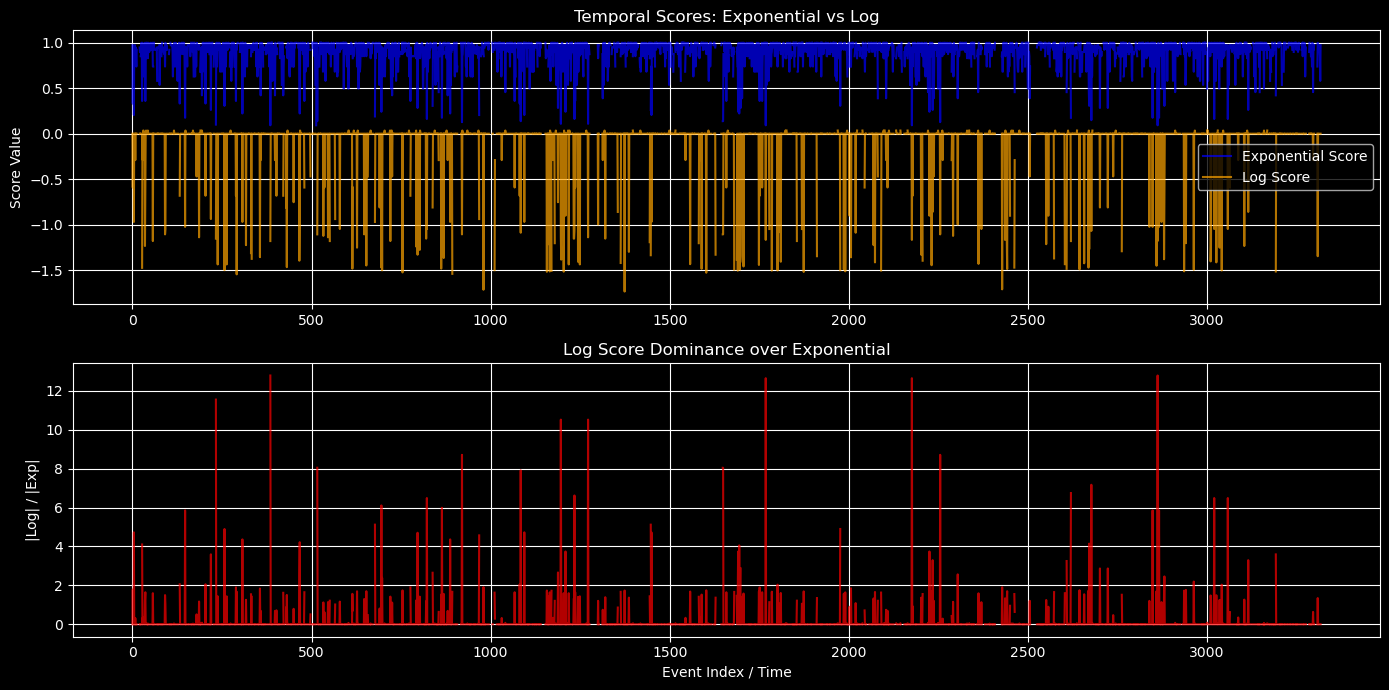

In [182]:
import matplotlib.pyplot as plt
import numpy as np

df = article_df.copy()

# Optional: sort by time/index if necessary
# df = df.sort_values('timestamp')

# Compute absolute ratio for dominance visualization
df['log_vs_exp_ratio'] = np.abs(df['log_score_clean']) / (np.abs(df['temporal_score_exp_clean']) + 1e-6)

plt.figure(figsize=(14,7))

# 1️⃣ Raw temporal scores
plt.subplot(2,1,1)
plt.plot(df.index, df['temporal_score_exp_clean'], label='Exponential Score', alpha=0.7, color='blue')
plt.plot(df.index, df['log_score_clean'], label='Log Score', alpha=0.7, color='orange')
plt.title('Temporal Scores: Exponential vs Log')
plt.ylabel('Score Value')
plt.legend()
plt.grid(True)

# 2️⃣ Log dominance ratio
plt.subplot(2,1,2)
plt.plot(df.index, df['log_vs_exp_ratio'], color='red', alpha=0.7)
plt.title('Log Score Dominance over Exponential')
plt.ylabel('|Log| / |Exp|')
plt.xlabel('Event Index / Time')
plt.grid(True)

plt.tight_layout()
plt.show()
